# Math for Data Science

![math is coming meme](images/Brace-yourself-Math.jpeg)

In [1]:
# Imports

import numpy as np
import pandas as pd
from scipy import stats
np.random.seed(42)

import matplotlib.pyplot as plt
import seaborn as sns

# Part 1: Linear Algebra

## Scalars, Vectors, Matrices, Tensors: It's all about the dimension

![different_tensors.png](images/different_tensors.png)

**Tensors** are a general entity/way of understanding space and numbers which have *ranks* (or *orders*)

- **Scalar**: a 0-rank tensor
- **Vector**: a 1st-rank tensor
- **Matrix**: a 2nd-rank tensor

You can have higher-rank tensors, for example a 3rd-rank tensor that captures an image across three color channels (RGB)

### Vectors

In the context of linear algebra, a single number is a 0-dimensional entity called a **scalar**. But it is often useful to have data in the form of a 1-dimensional object called a **vector**, which can be thought of as a list of scalars. Think here of a `pandas` Series. And in addition to the values that compose the vector, we can characterize the vector as a whole as having a **magnitude** (size) and a **direction** (angle).

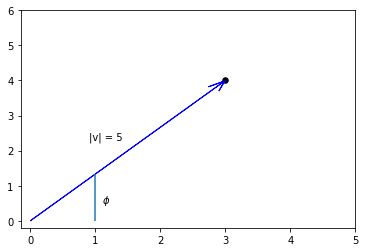

In [2]:
fig, ax = plt.subplots()

ax.scatter(3,4, s=30, color='black')
ax.arrow(0, 0, 3, 4, color='b', length_includes_head=True, head_width=.2, overhang=.9)
ax.vlines(1, ymin=0, ymax=4/3)

ax.annotate('$\phi$', xy=(1.1, 0.5))
ax.annotate('|v| = 5', xy=(0.9, 2.3))
ax.set_xlim(right=5)
ax.set_ylim(top=6);

### Distance Calculations

There are many times when we need to measure distances. For example, many modeling algorithms rely on a notion of **similarity** between data points.

In linear algebra, the **norm** behaves like a calculation of the distance from the origin. In other words, it captures the length or magnitude of the vector. 

But... how are we considering distance? In the above graph, we calculated the magnitude of the vector as $5$ - that's the _Euclidean distance_ between the origin ($[0,0]$) and our vector ($[3,4]$).

magnitude = $\sqrt{(3 - 0)^2 + (4 - 0)^2} = 5$

The Euclidean distance is captured by the **L2** norm.

In [3]:
# By hand...
np.sqrt((3 - 0)**2 + (4 - 0)**2)

5.0

In [4]:
# Using numpy
# Create our vector, a 1-dimensional tensor
vector = np.array([3,4])

# Now calculate that distance - using L2 aka ord=2
np.linalg.norm(vector, ord=2)

5.0

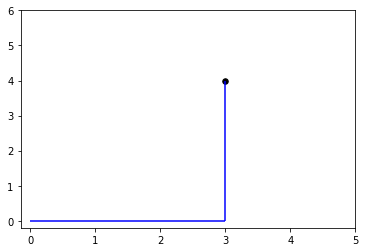

L1 Norm: 7.0


In [5]:
# There's also the L1 norm, calculating the Manhattan distance

# Visualize the Manhattan distance
fig, ax = plt.subplots()

ax.scatter(3,4, s=30, color='black')
ax.vlines(3, ymin=0, ymax=4, color='blue')
ax.hlines(0, xmin=0, xmax=3, color='blue')

ax.set_xlim(right=5)
ax.set_ylim(top=6);
plt.show()

# Now calculate that distance - using L1 aka ord=1
print(f"L1 Norm: {np.linalg.norm(vector, ord=1)}")

The point? Linear algebra here gives us a way to deal with space, and calculate direction - and we can use it to calculate distances between points!

### Matrices

We have been working all along with arrays and data frames that have a tabular structure of rows and columns. Such a 2-dimensional structure of numerical elements is known in linear algebra as a **matrix**.

In [6]:
# Let's load up a dataset from seaborn real quick...
gems = sns.load_dataset('diamonds')

In [7]:
# Check it out
gems.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [8]:
# This is a matrix under the hood!
gems.head().values

array([[0.23, 'Ideal', 'E', 'SI2', 61.5, 55.0, 326, 3.95, 3.98, 2.43],
       [0.21, 'Premium', 'E', 'SI1', 59.8, 61.0, 326, 3.89, 3.84, 2.31],
       [0.23, 'Good', 'E', 'VS1', 56.9, 65.0, 327, 4.05, 4.07, 2.31],
       [0.29, 'Premium', 'I', 'VS2', 62.4, 58.0, 334, 4.2, 4.23, 2.63],
       [0.31, 'Good', 'J', 'SI2', 63.3, 58.0, 335, 4.34, 4.35, 2.75]],
      dtype=object)

### Matrix Arithmetic

Matrices can be added and multiplied, and there are other distinctive operations on matrices that are often useful.

<details>
    <summary><b>Matrix Addition</b>: Click for details</summary>
$\begin{bmatrix}
a_{11} & a_{12} \\
a_{21} & a_{22}
\end{bmatrix}
+
\begin{bmatrix}
b_{11} & b_{12} \\
b_{21} & b_{22}
\end{bmatrix}
=
\begin{bmatrix}
a_{11} + b_{11} & a_{12} + b_{12} \\
a_{21} + b_{21} & a_{22} + b_{22}
\end{bmatrix}
$
    </details>
    
Note: Typically happens element-wise, but if the dimensions don't add up, numpy will _broadcast_ the tensors.

In [9]:
my_matrix1 = np.random.randint(low=1, high=11, size=(2, 2))
my_matrix1

array([[7, 4],
       [8, 5]])

In [10]:
my_matrix2 = np.random.randint(low=1, high=11, size=(2, 2))
my_matrix2

array([[ 7, 10],
       [ 3,  7]])

In [11]:
my_matrix1 + my_matrix2

array([[14, 14],
       [11, 12]])

<details>
    <summary><b>Matrix Multiplication</b>: Click for details</summary>
$$
\begin{equation}
\begin{bmatrix}
a_{1,1} & a_{1,2} \\
a_{2,1} & a_{2,2}
\end{bmatrix}
\begin{bmatrix}
b_{1,1} & b_{1,2} \\
b_{2,1} & b_{2,2}
\end{bmatrix}
=
\begin{bmatrix}
a_{1,1}\times b_{1,1} + a_{1,2}\times b_{2,1} & a_{1,1}\times b_{1,2} + a_{1,2}\times b_{2,2} \\
a_{2,1}\times b_{1,1} + a_{2,2}\times b_{2,1} & a_{2,1}\times b_{1,2} + a_{2,2}\times b_{2,2}
\end{bmatrix}
\end{equation}
$$
    </details>
    
Specifically, the dot product! Likely the most common operation when we think of "multiplying" matrices.

Note that the first matrix's length needs to match the second matrix's width (they need to share one opposing dimension)

(m-by-**n**) DOT (**n**-by-p) ==> (m-by-p)


In [12]:
my_matrix1.dot(my_matrix2)

array([[ 61,  98],
       [ 71, 115]])

### Solving a System of Equations with Matrices

In elementary algebra, we start by solving one equation for one unknown.

![image from mathelp.org](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSnrLW6J0FYge6zWDKqRrAtWx4Jf0HkhMiwHQ&usqp=CAU) image source: mathelp.org

Linear algebra gives us the tools to solve many equations simultaneously. Suppose we have:

$$ \begin{align}
 x_1 - 2x_2 + 3x_3 &= 9 \\
 2x_1 - 5x_2 + 10x_3 &= 4 \\
 6x_3 &= 0 
\end{align}$$

We can write these equations as a single matrix equation:

$$ 
\begin{bmatrix} 
    1 & -2 & 3 \\
    2 & -5 & 10 \\
    0 & 0 & 6
\end{bmatrix}
\begin{bmatrix} 
    x_1 \\
    x_2 \\
    x_3
\end{bmatrix}
=
\begin{bmatrix} 
    9 \\
    4 \\
    0
\end{bmatrix}
$$

Or: $A\vec{x} = \vec{b}$, where

- $A = \begin{bmatrix} 
    1 & -2 & 3 \\
    2 & -5 & 10 \\
    0 & 0 & 6
\end{bmatrix}$

- $\vec{x} = \begin{bmatrix} x_1 \\ x_2 \\ x_3 \end{bmatrix}$

- $\vec{b} = \begin{bmatrix} 9 \\ 4 \\ 0 \end{bmatrix}$

So now we're solving for a *vector* of unknowns. To solve $A\vec{x} = \vec{b}$ for $x$, we multiply both sides of the equation by **$A^{-1}$, the inverse of $A$**:

$A^{-1}A\vec{x} = A^{-1}\vec{b}$

which, after $A$ and $A^{-1}$ cancel out, becomes:

$\vec{x} = A^{-1}\vec{b}$

In [13]:
A = np.array([
    [1, -2,  3],
    [2, -5, 10],
    [0,  0,  6]
])

b = np.array([9, 4, 0]).reshape(3, 1)

In [14]:
# Calculating the inverse of A
inv_A = np.linalg.inv(A)

# Then using the dot product to multiply inv_A and b
# Because matrix multiplication is complicated... but dot products are great!
inv_A.dot(b)

array([[37.],
       [14.],
       [ 0.]])

In [15]:
# Or use the .solve() method
np.linalg.solve(A, b)

array([[37.],
       [14.],
       [ 0.]])

Note: I said that $A$ and $A^{-1}$ cancel out. Technically, multiplying a matrix by its inverse produces $I$, the **identity matrix**, a square matrix with 1's down the main diagonal and 0's everywhere else. 

Inverse and identity matrices have important properties:

- $IA = A$
- $AI = A$
- $AA^{-1} = I$
- $A^{-1}A = I$
- $I\vec{x} = \vec{x}$

(but yes in practice they cancel out)

## A Taste of the Linear Algebra to Come

AKA why do data scientists care about linear algebra?

### Eigenvalues, Singular Values, Principal Components

It is often useful to express a matrix as a **product** of other matrices. Sometimes the gain is only in computational efficiency, but there are also certain factorizations or **decompositions** that are useful in other ways.

An **eigendecomposition** reduces a matrix to a collection of vectors that capture the *linear* action of the matrix. Selecting the vectors that produce the largest such linear transformations is the idea behind **principal component analysis**, which is useful for reducing high-dimensional datasets to lower-dimensional problems.

Eigendecompositions are possibly only for square matrices; a **singular value decomposition** is a more fundamental matrix factorization that can be applied to any matrix.

### Recommendation Systems

How do recommendation engines work?

Imagine representing your interests (film genres, book subjects, music styles) as a **vector**: larger numbers represent larger preferences. Now do this for multiple people. Now we can think of comparing these vectors directly or against some target such as whether a given product/service was used/bought/watched.

### Clustering

When our data is **unlabeled** we have a problem in **unsupervised learning**. One major strategy for this type of problem is to impose a *similarity* metric on our data points. Similarity between data points is measured as some function of the **(vector) distance** between them.

### Cosine Similarity

One similarity metric for vectors is **cosine similarity**, which computes the *cosine of the angle between them*. Note that this is always well-defined for non-zero vectors since any two vectors determine a plane (in which the angle can be measured).

### Images

We saw already above the idea of representing a digital image as a **tensor** of values that encode facts about each pixel in the digitization. **Neural networks** are good for working with tensors of high dimension. 

## Linear Algebra Resources & References

- [10 Powerful Applications of Linear Algebra in Data Science](https://www.analyticsvidhya.com/blog/2019/07/10-applications-linear-algebra-data-science/) (if you're still wondering why you need to care!)
- [Introduction to Applied Linear Algebra: Norms & Distances](https://towardsdatascience.com/introduction-to-applied-linear-algebra-norms-distances-2451e6325925)
- [Gentle Introduction to Vector Norms in Machine Learning](https://machinelearningmastery.com/vector-norms-machine-learning/)
- [Scalars, Vectors, Matrices and Tensors - Linear Algebra for Deep Learning (Part 1)](https://www.quantstart.com/articles/scalars-vectors-matrices-and-tensors-linear-algebra-for-deep-learning-part-1/) from QuantStart - a thorough detailing of linear algebra specifically through the lens of data science. This first post is discussing the difference between different-rank tensors, but they have several other posts in this series


# Part 2: Calculus

## What Has Calculus Ever Done For You?

<img src="https://c.tenor.com/nr56QSWEkzwAAAAd/calculus-cat-cat-math.gif" alt="cat learning calculus gif from tenor" width=400>

We have already had occasion to use calculus in a few places. Calculus shows us:

- that the mean of a group of numbers is the number $n$ that minimizes the sum of squared differences $\Sigma(p-n)^2$ for each number $p$ in the group;
- that the median of a group of numbers is the number $m$ that minimizes the sum of absolute differences $\Sigma|p-m|$ for each number $p$ in the group;
- a way to find the coefficients for a linear regression optimization problem.

The two main tools of calculus are **differentiation** and **integration**. For functions of one dimension:

- Differentiation gives us the *slope* of the function at any point.
- Integration gives us the *area under the curve* of the function between any two points.

![calc](https://t3.ftcdn.net/jpg/04/02/03/54/240_F_402035410_ihv2bsAJAWRLG1BiFGtpiCUEMJXVxtbW.jpg)

Surprisingly, these two operations turn out to be inverses of one another, in the sense that the derivative of the integral of a given function takes us back to the initial function. This is known as the First Fundamental Theorem of Calculus.

### Differentiation

To find the slope of a function *at a point*, we imagine calculating the slope of the function between two points, and then gradually bringing those two points together. Consider the slope of the function $y=x^2$ at the point $x=100$.

We'll calculate the slope of the parabola between $x_1=100$ and $x_2=1000$, and then slowly move $x_2$ close to $x_1$:

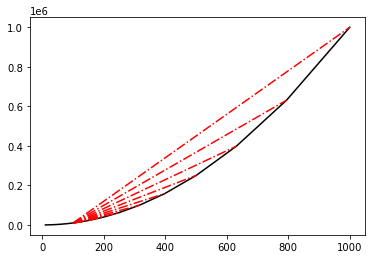

In [16]:
X = np.logspace(3, 1, 21)

fig, ax = plt.subplots()
ax.plot(X, X**2, c='black')
for x_ in X[:11]:
    ax.plot([100, x_], [10000, x_**2], 'r-.')

# Integration

Integration is how we calculate the area under a curve. 

How do you calculate the area of a shape with a curvy side? Imagine approximating the shape with rectangles, and then imagine making those rectangles narrower and narrower.

Again, let's work with the parabola $y=x^2$ between $x=100$ and $x=1000$:

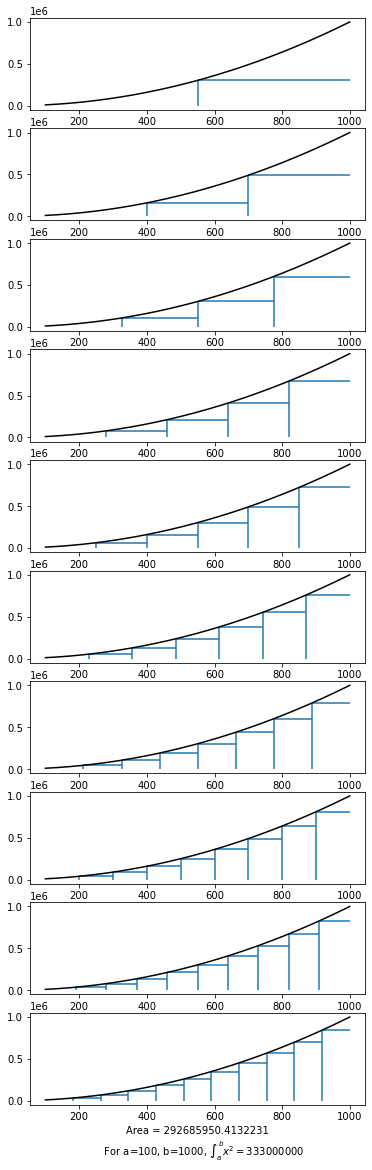

In [17]:
# This will show how we imagine ever narrower rectangles
# under the curve to approximate the area underneath it.

spacing = np.arange(3, 13)

X = [np.linspace(100, 1000, step) for step in spacing]
X_curve = np.linspace(100, 1000, 10000)

fig, ax = plt.subplots(10, figsize=(6, 20))

for num in spacing:
    ax[num-3].plot(X_curve, X_curve**2, color='black')
    for j in range(1, len(X[num-3])-1):
        ax[num-3].hlines(X[num-3][j]**2, X[num-3][j], X[num-3][j+1])
        ax[num-3].vlines(X[num-3][j], 0, X[num-3][j]**2)
    ax[num-3].set_xlabel(f'Area = {900/(num-1) * sum(X[num-3][1:-1]**2)}\n\
    For a=100, b=1000, $\int^b_ax^2=333000000$')
plt.show()

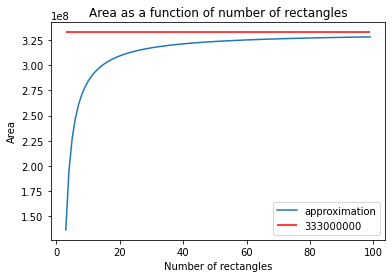

In [18]:
# This will show the area of the rectangles as the number
# of rectangles increases.

spacing_longer = np.arange(3, 100)
X_longer = [np.linspace(100, 1000, step) for step in spacing_longer]

areas = [900 / (num-1) * sum(X_longer[num-3][1:-1]**2) for num in spacing_longer]

fig, ax = plt.subplots()

ax.hlines(333000000, 3, 99, label='333000000', color='r')
ax.plot(spacing_longer, areas, label='approximation')
ax.set_title('Area as a function of number of rectangles')
ax.set_xlabel('Number of rectangles')
ax.set_ylabel('Area')
plt.legend();

## Enter Machine Learning

This is a good time to think for a second about what it means to build models. Ultimately we're saying that, given some number of inputs (x, or features in our datasets) we can predict the outcome (y, or our target variable).

When we first started with simple linear regression, we were trying to find a **line of best fit** (and we'll get to that "best fit" part in a second) which captures some way of taking in a single variable (x) and transforming it (by maybe multiplying by a slope and maybe adding some constant) to find a continuous output (y).

> Example: if we believe the miles per gallon rate of a car is just a function of its horsepower, we would try to find the rate at which the horsepower then changes the MPG, plus some constant if the MPG isn't exactly zero when the horsepower is zero

### Example

In [19]:
# Grab the data from 'auto-mpg.csv'
mpg_df = pd.read_csv("data/auto-mpg.csv")

In [20]:
# Explore the data
mpg_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


Let's first try this out ourselves.

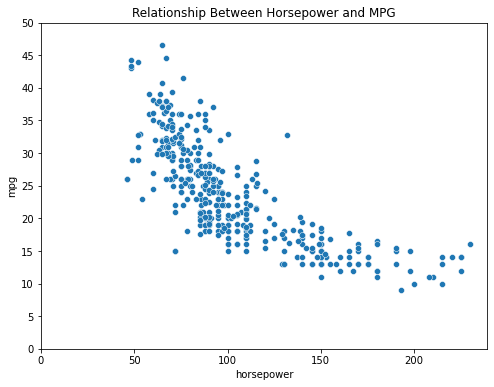

In [21]:
plt.figure(figsize=(8, 6))

# Plotting the actual relationship between horsepower and mpg
sns.scatterplot(x='horsepower', y='mpg', data=mpg_df)

plt.xticks(ticks=range(0, 250, 50))
plt.yticks(ticks=range(0, 55, 5))

plt.title('Relationship Between Horsepower and MPG')
plt.show()

And now, with machine learning:

In [22]:
# Let's create a linear regression model using just the horsepower column
from sklearn.linear_model import LinearRegression

X = mpg_df[['horsepower']]
y = mpg_df['mpg']

model = LinearRegression()
model.fit(X, y)

m = model.coef_[0] # Find the slope - coefficient for the single variable in X
b = model.intercept_ # Find the intercept

print(f'Slope: {m}')
print(f'Intercept: {b}')

Slope: -0.15784473335365365
Intercept: 39.93586102117047


In [23]:
# Let's check the prediction for a row by hand
# y = mx + b
y_pred_row0 = m * mpg_df['horsepower'][0] + b

In [24]:
# Same as using sklearn
model.predict(mpg_df['horsepower'][0].reshape(1,-1))

array([19.41604569])

In [25]:
print(f"Actual: {mpg_df['mpg'][0]} - Predicted: {y_pred_row0} = {mpg_df['mpg'][0] - y_pred_row0}")

Actual: 18.0 - Predicted: 19.416045685195492 = -1.416045685195492


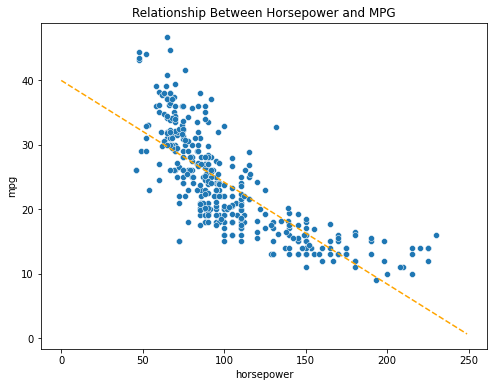

In [26]:
# Now let's plot the line over the actual values
plt.figure(figsize=(8, 6))

# Plotting the actual relationship between horsepower and mpg
sns.scatterplot(x='horsepower', y='mpg', data=mpg_df)

# Now plotting the line of best fit found by our model
x_vals = range(0, 250)
y_vals = b + m * x_vals
# Would be the same as model.predict(np.array(x_vals).reshape(-1,1))
plt.plot(x_vals, y_vals, '--', color='orange')

plt.title('Relationship Between Horsepower and MPG')
plt.show()

The above graph shows the approximate best fit line for the relationship between `horsepower` and `mpg` in our data, which we found through sklearn's function. But what if we wanted to test how it changes if we change that slope?

As you can imagine, as we test out different slopes, keeping the y-intercept constant, we can see how that affects our error - our Residual Sum of Squares (RSS)

### Remember Our Cost Function

> A cost function is a function that calculates the error of our models predictions vs ground truth.
>
> "Cost function" = "Loss function" = "Error"
    
    
#### Residual Sum of Squares

Ordinary least squares regression tries to minimize the RSS:

$ \large RSS = \sum_{i=1}^n(actual - expected)^2 = \sum_{i=1}^n(y_i - \hat{y})^2 $

In [27]:
def RSS(x_values, y_values, m, b):
    y_pred = (b + m*x_values)
    return np.sum(np.square(y_pred - y_values))

In [28]:
x = mpg_df['horsepower'] # Grabbing x as a series this time
y = mpg_df['mpg'] # And our target

results = {}
# Testing 20 slope options between -0.5 and 0.5
for slope in np.linspace(-0.5, 0.5, 20):
    results[slope] = RSS(x, y, slope, 39.93) # remember, holding b constant

In [29]:
for k, v in results.items():
    print(f"Slope: {k}: {v:,.2f}") # using :,.2f to round and add commas

Slope: -0.5: 578,221.61
Slope: -0.4473684210526316: 416,701.84
Slope: -0.39473684210526316: 282,093.55
Slope: -0.34210526315789475: 174,396.76
Slope: -0.2894736842105263: 93,611.46
Slope: -0.2368421052631579: 39,737.64
Slope: -0.1842105263157895: 12,775.32
Slope: -0.13157894736842107: 12,724.49
Slope: -0.07894736842105265: 39,585.14
Slope: -0.026315789473684237: 93,357.29
Slope: 0.02631578947368418: 174,040.93
Slope: 0.07894736842105265: 281,636.06
Slope: 0.13157894736842102: 416,142.67
Slope: 0.18421052631578938: 577,560.78
Slope: 0.23684210526315785: 765,890.38
Slope: 0.2894736842105263: 981,131.47
Slope: 0.3421052631578947: 1,223,284.05
Slope: 0.39473684210526305: 1,492,348.12
Slope: 0.4473684210526315: 1,788,323.68
Slope: 0.5: 2,111,210.73


The below graph zooms in to show how the model chose that exact slope for the line of best fit, by showing the residual sum of squares (RSS) as you change the slope of that line.

![Slope-RSS relationship image](images/slope-rss-relationship.png)



Note that the above curve is just for ONE coefficient, the slope, while holding the y-intercept constant. Already with simple linear regression we have to start using gradients, from partial derivatives, in order to optimize both parameters at the same time.

If we imagine all the different ways we can adjust **both** parameters and measure how well the model performs with the loss or **cost function**, we can plot this as a surface in this multidimensional plane:

<img alt="gradient descent image from Section 23 - Gradient Descent: Step Sizes" src="images/gradientdescent.png" width=400>

You can then imagine how much more complicated this cost curve would become as we realize that more than one variable could have an impact on our target, and move beyond simple linear regression!

> Back to the example: If horsepower alone cannot be used to predict the miles per gallon rate of a car, maybe the horsepower plus the number of cylinders plus the weight of the car actually can better predict the MPG. Each of those three separate variables will have their own way of changing the MPG, that rate of change, and in the end you might have some constant term too



## Gradient Descent

![gradient descent in 3d gif from Andrew Ng](https://thumbs.gfycat.com/AngryInconsequentialDiplodocus-size_restricted.gif)

**Gradient descent** is an optimization procedure that uses the _gradient_ (a generalized notion of a derivative) of the cost function.

The gradient helps us recognize how to go "downhill" towards the lowest point, which would minimize the cost function.

In the multivariate case, the gradient tells us how the function is changing **in each dimension**. A large value of the derivative with respect to a particular variable means that the gradient will have a large component in the corresponding direction. Therefore, **the gradient will point in the direction of steepest increase**.

If we want to improve our guess at the minimum of our loss function, we'll move in the **opposite direction** of the gradient away from our last guess. Hence we are using the *gradient* of our loss function to *descend* to the minimum value of the relevant loss function.

#### Summary of Gradient Descent:

- Make a guess at where the function attains its minimum value
- Calculate the gradient/derivative at that point
- Use that value to decide how to make your next guess!

Repeat until we get the derivative as close as we like to 0.

### Step Size

As we calculate the gradient (or, rather, as our model does) we make changes, see what happens, and make more changes - all in an educated, math-informed way.

> Let's call each of these changes a **step**, and the size of the change our **step size**. 

If our steps are _too big_, we risk skipping over the minimum value (optimal parameters).

BUT if our steps are _too small_, it might take us too long to reach the minimum value.

Here's an elegant solution: Make the size of your step **proportional to the value of the derivative at the point where you currently are in parameter space**! If we're very far from the minimum, then our values will be large, and so we therefore can safely take a large step; if we're close to the minimum, then our values will be small, and so we should therefore take a smaller step.

I said the size of the step is proportional to the value of the derivative. The constant of proportionality is often called the **"learning rate"**. 

1. A small learning rate requires many updates before reaching the minimum 
2. The optimal learning rate quickly converges to the minimum point 
3. A learning rate that is too large leads to divergent behavior: you may bounce around the minimum!  

![learning_rate](https://www.jeremyjordan.me/content/images/2018/02/Screen-Shot-2018-02-24-at-11.47.09-AM.png)



## Calculus Resources and References


- The same guy who runs the 3 Blue 1 Brown account also does some videos for Khan Academy, including the [Partial Derivatives videos from the Multivariable Calculus course](https://www.khanacademy.org/math/multivariable-calculus/multivariable-derivatives)

#### Gradient Descent:

- Andrew Ng was a famous name in machine learning before he created the ultra-popular [Machine Learning Coursera course](https://www.coursera.org/learn/machine-learning), which has a great explanation of gradient descent

    - [This blog post by Chris McCormick](https://mccormickml.com/2014/03/04/gradient-descent-derivation/) breaks out some of the explanation from the course, specifically trying to derive the math
    
- [Machine Learning Mastery has a tutorial on Gradient Descent for Machine Learning](https://machinelearningmastery.com/gradient-descent-for-machine-learning/), walks through gradient descent with surprisingly little math

- This page helps to explain the dangers of learning rates that are too large and too small: https://www.jeremyjordan.me/nn-learning-rate/.

-----

# Level Up Section!

## Level Up: Tips for Gradient Descent

A few of the tips mentioned in [Machine Learning Mastery's tutorial on Gradient Descent for Machine Learning](https://machinelearningmastery.com/gradient-descent-for-machine-learning/)

- **Plot Cost versus Time:** Collect and plot the cost values calculated by the algorithm each iteration, when we get to models that give you their iterations. The expectation for a well performing gradient descent run is a decrease in cost each iteration. If it does not decrease, try reducing your learning rate.
- **Learning Rate:** The learning rate value is a small real value such as 0.1, 0.001 or 0.0001. Try different values for your problem and see which works best.
- **Rescale Inputs:** The algorithm will reach the minimum cost faster if the shape of the cost function is not skewed and distorted. You can achieved this by rescaling all of the input variables (X) to the same range, such as [0, 1] or [-1, 1].

## Level Up: Matrix Equations

Many transformations of *products* of matrices can be expressed in terms of the transformation applied to the factors *in reverse order*.

$(AB)^T = B^TA^T$

In [ ]:
A = np.random.randint(low=1, high=11, size=(10, 2))
B = np.random.randint(low=1, high=11, size=(2, 6))

In [ ]:
(A.dot(B)).T

In [ ]:
B.T.dot(A.T)

$(AB)^{-1} = B^{-1}A^{-1}$

In [ ]:
A = np.random.randint(low=1, high=11, size=(3, 3))
B = np.random.randint(low=1, high=11, size=(3, 3))

In [ ]:
np.linalg.inv(A.dot(B))

In [ ]:
np.linalg.inv(B).dot(np.linalg.inv(A))

## Level Up: The Determinant

### Determinant

The **determinant** of a square matrix $M$, $|M|$, represents the area (or, in higher dimensions, the volume) of the parallelogram (parallelepiped) formed by the rows or columns of $M$. And it is also related to the inverse of $M$.

For a 2x2 matrix $\begin{bmatrix} a & b \\ c & d\end{bmatrix}$, the determinant is equal to $ad - bc$.

In [ ]:
my_matrix1 = np.random.randint(low=1, high=11, size=(2, 2))

my_matrix1

In [ ]:
np.linalg.det(my_matrix1)

In [ ]:
a = my_matrix1[0][0]
d = my_matrix1[1][1]
b = my_matrix1[0][1]
c = my_matrix1[1][0]

a*d - b*c

## Leel Up: The Chain Rule

$\large\frac{d}{dx}[f(g(x))] = f'(g(x))g'(x)$

That is: The derivative of a *composition* of functions is: the derivative of the first applied to the second, multiplied by the derivative of the second.

So if we know e.g. that $\frac{d}{dx}[e^x] = e^x$ and $\frac{d}{dx}[x^2] = 2x$, then we can use the Chain Rule to calculate $\frac{d}{dx}[e^{x^2}]$. We set $f(x) = e^x$ and $g(x) = x^2$, so the derivative must be:

$\large\frac{d}{dx}[e^{x^2}] = (e^{x^2})(2x) = 2xe^{x^2}$.

### Exercise:

Calculate the derivatives for the following compositions:

1. $\frac{d}{dx}[sin(4x)]$

<details>
    <summary> Answer
    </summary>
    $f(x) = sin(x)$ <br/>
    $g(x) = 4x$ <br/>
    So the derivative will be: $cos(4x)*4 = 4cos(4x)$
    </details>

2. $\frac{d}{dx}[e^{sin(x)}]$

<details>
    <summary> Answer
    </summary>
    $f(x) = e^x$ <br/>
    $g(x) = sin(x)$ <br/>
    So the derivative will be: $e^{sin(x)}*cos(x) = cos(x)e^{sin(x)}$

## Level Up: Partial Differentiation

Partial differentiation is required for functions of multiple variables. If e.g. I have some function $h = h(a, b)$, then I can consider how $h$ changes with respect to $a$ (while keeping $b$ constant)––that's $\frac{\partial h}{\partial a}$, and I can consider how $h$ changes with respect to $b$ (while keeping $a$ constant)––that's $\frac{\partial h}{\partial b}$. And so the rule is simple enough: If I'm differentiating my function with respect to some variable, I'll **treat all other variables as constants**.

Consider the following function:

$\large\xi(x, y, z) = x^2y^5z^3 - ze^{cos(xy)} + (yz)^3$;

for some parameters $x$, $y$, and $z$.

What are the partial derivatives of this function?

$\large\frac{\partial\xi}{\partial x} = ?$

<br/>
<details>
    <summary>
        Check
    </summary>
    <br/>
    $2xy^5z^3 + yze^{cos(xy)}sin(xy)$
    </details>
<br/>

$\large\frac{\partial\xi}{\partial y} = ?$

<br/>
<details>
    <summary>
        Check
    </summary>
    <br/>
    $5x^2y^4z^3 + xze^{cos(xy)}sin(xy) + 3y^2z^3$
    </details>
<br/>

$\large\frac{\partial\xi}{\partial z} = ?$

<br/>
<details>
    <summary>
        Check
    </summary>
    <br/>
    $3x^2y^5z^2 - e^{cos(xy)} + 3y^3z^2$
    </details>